# Modulación no lineal en frecuencia para pulsos de radar

## Objetivos

- Analizar las modulaciones no lineal de fecuencia en pulsos de radar.
- Comparar las mismas contra el pulso chirp.
- Analizar el efecto de aplicar una ventana al pulso no lineal.
- Crear funciones que permitan la aplicación de las modulaciones no lineales en otros trabajos.



## Introducción

El pulso emitido por el radar es uno de los puntos críticos a la hora de realizar un diseño. Los distintos parámetros del pulso nos determinarán parámetros del radar como pueden ser: resolución espacial (distancia mínima entre dos obstáculos para poder discriminarlos), rango Doppler (rango de velocidades medibles con el radar) y alcance,  entre otros. Es importante seleccionar el pulso óptimo para la aplicación.

Realizaremos un estudio de las distintas alternativas posibles para el pulso emitido por el radar. Se busca analizar las diferencias en rango espacial. Los pulsos se comparan utilizando la misma duración de pulso $T$, amplitud $A$ y ancho de banda $B$. El pulso que utilizaremos como patrón sera un pulso con modulación lineal de frecuencia (chirp). 

Esta nota presenta funciones que permiten la creación de pulsos con modulación lineal y no lineal de frecuencia y el análisis de los mismos en rango. 

### Principio de fase estacionaria

La fase estacionaria es un concepto importante en el análisis de pulsos de radar. En el contexto del procesamiento de señales de radar, la fase estacionaria se refiere a una situación en la que la frecuencia de una señal de radar varía con el tiempo, pero la fase de la señal permanece constante.

En otras palabras, la fase estacionaria ocurre cuando la frecuencia de la señal de radar cambia de manera no lineal, pero el patrón de fase se mantiene constante. Este patrón de fase constante es importante porque proporciona información sobre la distancia a los objetos detectados por el radar.

En términos matemáticos, la fase estacionaria se puede describir como una función que cambia rápidamente en un intervalo de tiempo corto, pero que se mantiene constante en intervalos de tiempo más largos. La fase estacionaria es especialmente útil en la detección de objetivos cercanos, donde la separación de los objetivos en el rango es pequeña.

El análisis de la fase estacionaria se utiliza comúnmente en sistemas de radar de pulsos de banda ancha, donde la frecuencia de la señal varía no linealmente en el tiempo. El análisis de la fase estacionaria se utiliza para estimar la distancia y la velocidad de los objetivos detectados por el radar, lo que permite la identificación precisa de objetos en el campo de visión del radar.

El pulso de radar se define como:

$$x(t) = a(t) e^{j \phi(t)},  \frac{-T}{2} \leq t \leq \frac{T}{2}$$

donde $a(t)$,  $\phi(t)$,  y $T$ representan amplitud,  fase,  y ancho del pulso de $x(t)$,  respectivamente. Donde la frecuencia instantánea $f_n$ en el tiempo $t_n$ esta determinada por la derivada de la fase

$$f_n = \frac{1}{2\pi} \phi'(t_n)$$

Siendo $X(f_n)$ la transformada de Fourier de $x(t)$ en la frecuencia instantánea $f_n$. A partir del principio de fase estacionaria, podemos relacionar la densidad espectral de potencia con la variación de frecuencia según:

$$|X(f_n)|^2 \approx 2\pi \frac{a^2(t_n)}{|\phi''(t_n)|} $$


Recordando que en radar se suele definir $a(t)=A$ para maximizar la energía transmitida. Siendo $\theta(f)$ la fase de $X(f)$ con ancho de banda $B$,  podemos estimar esta última a partir de una función $Z(f)$.

$$ \theta''(f) \approx k|Z(f)|^2$$

Donde k es una constante por lo anterior mencionado respecto a la amplitud del pulso. Integrando en el ancho de banda podemos obtener entonces la función retardo de grupo,  definida por la primera derivada de la fase de la transformada de fourier de la señal.

$$ T_g = -\frac{1}{2\pi}\theta'(f) = -\frac{1}{2\pi} \int_{-\frac{B}{2}}^f \theta''(\alpha) d\alpha $$

Reemplazando las ecuaciones anteriores podemos obtener al retardo de grupo en función de $Z(f)$.

$$ T_g = -\frac{k}{2\pi} \int_{-\frac{B}{2}}^f |Z(\alpha)|^2 d\alpha + r$$

Donde r es una constante calculada a partir de los límites: 

$$ T_g(B/2)=T/2,  \hspace{0.5cm} T_g(-B/2)=-T/2$$

Ahora podemos calcular la frecuencia a partir de la función inversa del retardo de grupo.

$$ f(t)=T_g^{-1}(f)$$

La fase puede calcularse en función de la frecuencia como:

$$\phi (t) = 2\pi \int_\frac{-T}{2}^t f (\alpha)  \, d\alpha$$

Muchas de las funciones de modulación no lineal están definidas por el retardo de grupo. En este caso se calcula numericamente la función inversa para obtener la frecuencia.

### Pulso chirp

Un pulso chirp es una señal de radiofrecuencia que varía su frecuencia linealmente en el tiempo, generando un espectro de frecuencia que se extiende desde una frecuencia inicial hasta una final.

La idea básica detrás del pulso chirp es que su frecuencia varía de manera lineal durante la duración del pulso. Esto significa que la frecuencia aumenta (o disminuye) con el tiempo, creando una señal que se desplaza a través del espectro de frecuencia a medida que el tiempo avanza. En términos matemáticos, esta variación de frecuencia se puede describir como una función de rampa en el tiempo.

El pulso chirp $s(t)$ se describe a continuacion.

\begin{equation}
s(t) = \operatorname{rect}\left(\frac{t-t_0}{T}\right) \exp\left[j\pi( 2f_c(t-t_0)+ k(t-t_0)^2)\right]
\end{equation}

Donde:

* $t_0$ es el tiempo de inicio del pulso.
* $f_c$ es la frecuencia central del pulso.
* $k$ es la tasa de cambio de la frecuencia con respecto al tiempo.
* $\operatorname{rect}(x)$ es la función rectangular, que es 1 para $|x| \leq 0.5$ y 0 para $|x| > 0.5$.

### Medidas de desempeño 
Antes de comenzar con el análisis definimos algunos parámetros que nos permitirán realizar comparaciones con los pulsos seleccionados [1]:

PSLR (Pulse-to-Sidelobe Ratio): se refiere a la relación entre la energía del pulso principal y la energía de los lóbulos laterales. Los lóbulos laterales son componentes secundarios de la señal de radar que se propagan en direcciones no deseadas. El PSLR es una medida de la calidad de la señal de radar, ya que un PSLR más alto indica que la energía del pulso principal es mucho mayor que la energía de los lóbulos laterales.

ISLR (Integrated Sidelobe Ratio): se refiere a la energía total de los lóbulos laterales dividida por la energía total del pulso principal. El ISLR es una medida de la presencia y la cantidad de energía en los lóbulos laterales.

En cuanto a las aplicaciones, la medición del PSLR y el ISLR se utiliza comúnmente en la evaluación de la calidad de los pulsos de radar no lineales en diversas aplicaciones de radar, como la detección de objetivos, la imagen de radar, la medición de distancias y la observación de fenómenos atmosféricos. También se utilizan en el diseño y la evaluación de antenas de radar y sistemas de procesamiento de señales de radar.

En términos de interpretación de los resultados, un PSLR alto indica una señal de radar de mayor calidad, mientras que un ISLR bajo indica una menor presencia de lóbulos laterales. En general, un PSLR alto y un ISLR bajo indican una mejor calidad de la señal de radar y una mayor capacidad para detectar y medir objetivos de radar.

* PSLR: ratio of maximum sidelobe level squared with respect to the mainlobe level squared

$${\sf PSLR}(s) = \frac{(\max_p{R_p})^2}{R_s^2(0)}$$


* ISLR: integrated sidelobe ratio

$${\sf ISLR}(s) = \frac{1}{R_s^2(0)}\sum_{m=-M, m \neq 0}^M R_s^2(m) $$

* NPSLR: PSLR normalized to LFM waveform

$${\sf NPSLR}(s) = {\sf PSLR}(s)/{\sf PSLR}_{LFM}$$

* NISLR: ISLR normalized to LFM waveform

$${\sf NISLR}(s) = {\sf ISLR}(s)/{\sf ISLR}_{LFM}$$

El NPSLR y el NISLR son medidas normalizadas del PSLR y el ISLR que se utilizan para evaluar la calidad de una señal de radar en términos relativos al pulso Chirp, para esto se normalizan en funcion del PSLR e ISLR de la señal chirp. 

* Función de costo donde $\beta$ especifica el factor priorizado en el costo.
$$Q(s; \beta) = \beta · {\sf NPSLR}(s) + (1 − \beta) · {\sf NISLR}(s)$$

$R_s$ indica el valor pico del lóbulo principal y $R_p(k)$ el valor pico del k-esimo lóbulo secundario.

La función de costo es utilizada en las modulaciones no lineales 1 y 2 propuestas en este trabajo. La misma se utiliza para determinar los distintos coeficientes que ajustan la alinealidad del pulso. Dichos coeficientes se encuentran tabulados para distintos valores de $\beta$

### Motivación para el análisis

Se busca una modulación no lineal que permita disminuir la amplitud de los lóbulos laterales sin afectar significativamente el ancho del lobulo principal. Esto nos permite reducir la interferencia que pueden ocasionar elementos cercanos al obetivo.


### Puntos a comparar

- Ancho del lóbulo principal
- Amplitud de los lóbulos laterales respecto al lóbulo principal

### Funciones de interés del módulo

Funciones que permiten obtener la función de frecuencia vs tiempo para realizar la modulación no lineal del pulso.

* *NLFM_1(tt, tau, B, Beta, Grafico)*

* *NLFM_2(tt, tau, B, Beta, Grafico)*

* *NLFM_3(B_n3, tau_n3, dt_3, k, Grafico)*

Función de análisis:

* *Analisis_NLFM()*

Para más información sobre las funciones, referirse a las mismas donde encontrara una sección explicativa de cada una.


## Código

In [118]:
# Modulos utilizados 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import signal
from scipy.signal import argrelextrema
from ipywidgets import interact
from tabulate import tabulate
import pandas as pd

## Funciones 

In [276]:
def T_FFT(sig, dt, B, Titulo, Color, ax = None):

    '''
    Calculo DEP
    
    Parameters:
    ---
    sig: array
        Señal a estimar la DEP.
    dt:  float
        Tiempo entre muestras.
    B: float
        Ancho de banda de interes.
    Titulo: string
        Titulo del grafico
    Color: string
        Color de la traza.
    ax:
        Ejes para realizar el grafico.
    
    Returns:
    ---
    f: array
        Vector de frecuencia.
        
    fftN: array
        FFT biateral de la señal sig.

    '''



    N = len(sig)
    ff = np.linspace(0, 1/(dt*2), N//2)
    fftyy = abs(np.fft.fft(sig))
    fftN = (2/N)*np.concatenate((fftyy[N//2 + 1:], fftyy[:N//2])) # Usar numpy.fft.fftshift
    f = np.linspace(-1/(dt*2) + 1, 1/(dt*2), len(fftN))
    if ax is None:
        fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.plot(ff, (2/N)*fftyy[: N//2], Color, -ff[::-1], (2/N)*fftyy[N//2 + 1 :], Color)
    ax.set_xlabel('frecuencia [Hz]')
    ax.set_ylabel('FFT ')
    ax.set_title(Titulo)
    ax.grid()
    ax.set_xlim([-B*2, 2*B])
    
    return f, fftN

In [275]:
def Ambiguedad_D0(p, grafico, ax1 = None, ax2 = None):
  
    '''
    Funcion de ambiguedad en Rango
    
    Parameters:
    ---
    p: float
        Envolvente compleja del pulso.
    grafico: boolean
        Usado para indicarle a la funcion si grafica la funcion de ambiguedad.
    ax1, ax2:
        Ejes para realizar los graficos
        
    Returns:
    ---
    retardo: array
        Vector de retardo normalizado de la funcion de ambiguedad.
    FA_db: array
        Funcion de ambiguedad en dB.
    '''
  
    FA = signal.correlate(p, p, mode='same',  method='auto')
    #retardo=tt/tau-.5
    retardo = (np.arange(0, len(FA)) - len(FA)/2)/len(FA)
    FA_n = FA/np.max(FA)
    msk = np.where( FA!=0 )
    FA_db = np.zeros(len(FA))
    FA_db[msk] = 20*np.log10(np.abs(FA[msk]/np.max(FA)))
    if grafico == 1:
        
        if ax1 is None:
            fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(6*2*2,2*6*.75))
            ax1 = ax[0]
            ax2 = ax[1]
            
        ax1.set_title("Autocorrelacion en dB")
        ax1.plot(retardo, FA_db, 'b')
        ax1.set_xlabel("Desplazamiento")
        ax1.set_ylabel("Correlacion [dB]")
        ax1.grid()
     
        ax2.plot(retardo, FA_db, 'b')
        ax2.set_xlabel("Desplazamiento")
        ax2.set_ylabel("Correlacion [dB]")
        ax2.grid()
        ax2.set_xlim([-0.05, 0.05])

    return retardo, FA_db

In [121]:
def chirp_signal(A,  T,  fs,  B, NN):
    '''
    Sintetiza datos correspondiente a una señal chirp.
    
    Parameters:
    ---
    A: float
        Amplitud de la señal.
    T: float
        Duración del pulso [s].
    fs: float
        Frecuencia de muestreo [Hz].
    B: float
        Ancho de banda [Hz].
    NN: int
        Numero de puntos.

    Returns:
    ---
    S: array,  cfloat
        Envolvente compleja de la señal.
    t: array
        Tiempo (variable independiente).
    '''
    
    # Parametros
    ts = 1/fs # Tiempo de muestreo               
    Nsim = int(np.round(T/ts)) # Cantidad de muestras
    t = np.linspace(0, NN - 1, NN)*ts # Escala de tiempo
    f_i = -B/2
    f_e = B/2

    # Pulso
    S_phase = 2 * np.pi*(B*np.square(t)/(2*T) + f_i*t)
    S = A*np.exp(1j*S_phase)


    return S,  t

In [277]:
def Graficar_Pulso(tt, p, ax =  None):
    '''
    Grafica la envolvente compleja del pulso
    
    Parameters:
    ---
    tt: float
        Vector base de tiempo.
    p: float
        Envolvente compleja del pulso.
    ax: 
        Ejes para realizar el grafico.
    
    Returns:
    ---

    '''
    
    if ax is None:
        fig, ax = plt.subplots(ncols=1, nrows=1)
        

    ax.plot(tt,  np.real(p),  label='I')
    ax.plot(tt,  np.imag(p),  label='Q')
    ax.plot(tt,  np.abs(p),  label='A',  color='black',  linestyle='dashed')
    ax.set_xlabel(r'Tiempo [s]')
    ax.set_ylabel("Amplitud")
    ax.set_title("Pulso transmitido")
    ax.legend()

In [123]:
def buscar_max_cercano(array, valor):
    '''
    Busca valor en el array y devuelve el valor mas cercano.
    
    Parameters:
    ---
    array: 
        Array en el que se desea buscar.
    valor: 
        Valor a buscar.
    
    Returns:
    ---

    '''
    array = np.asarray(array)
    idx = (np.abs(array - valor)).argmin()
    return array[idx]

## Pulso rectangular

Se analiza la función de ambiguedad y la forma de onda del pulso cuadrado con tiempo de pulso: $\tau=66.71$ $\mu$ s. 

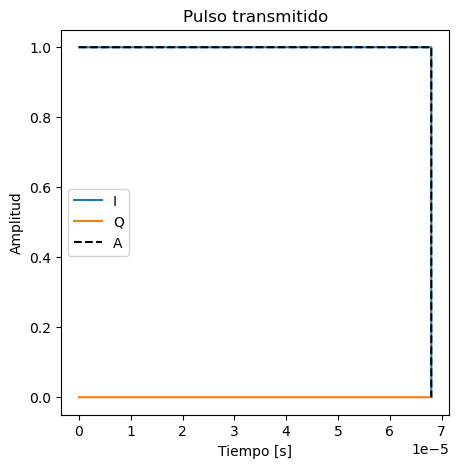

In [230]:
tau = 68e-6 # duracion del pulso en segundos
dt = 1/1e9 # tiempo de muestreo
Ap = 1 # Amplitud del pulso
B = 1.25e6 # Ancho de banda
tt = np.arange(0, tau + dt, dt) #vector base de tiempo
# señal pulso
y = Ap*(tt<tau)
nu = Graficar_Pulso(tt, y)

#nu=T_FFT(y, dt, B, 'FFT pulso rectangular', 'r')

### Pulso rectangular - Autocorrelación y ancho de banda

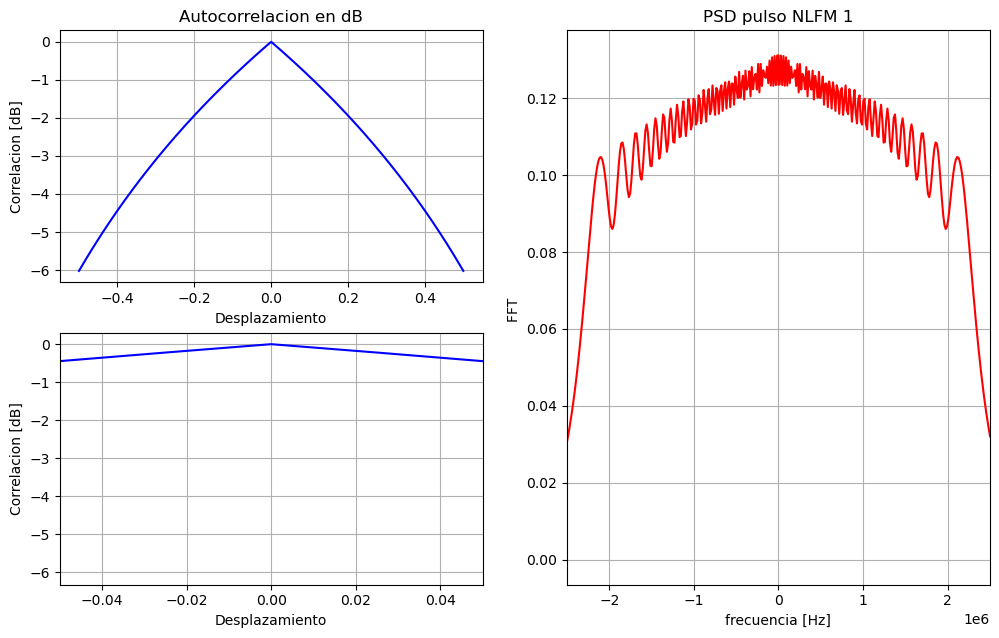

In [231]:
fig = plt.figure(figsize=(6*2,2*6*.6))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

nu = T_FFT(pulso, dt, B, 'PSD pulso NLFM 1', 'r', ax3)
nu = Ambiguedad_D0(y, 1, ax1, ax2)

## Pulso chirp

Se analiza la función de ambiguedad y la forma de onda del pulso con modulación lineal de frecuencia para un ancho de banda: $B=1.25$ MHz y un tiempo de pulso: $\tau=66.71$ $\mu$ s. 

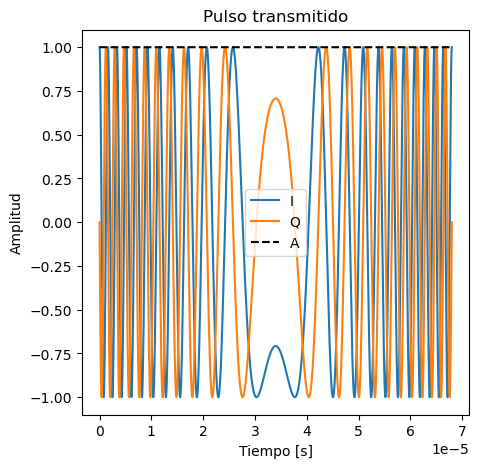

In [232]:
N = np.ceil(tau/dt) # Numero de puntos

pulso, tt = chirp_signal(1, tau, 1/dt, B, len(tt))
nn1 = Graficar_Pulso(tt, pulso)


### Pulso chirp - Autocorrelación y ancho de banda

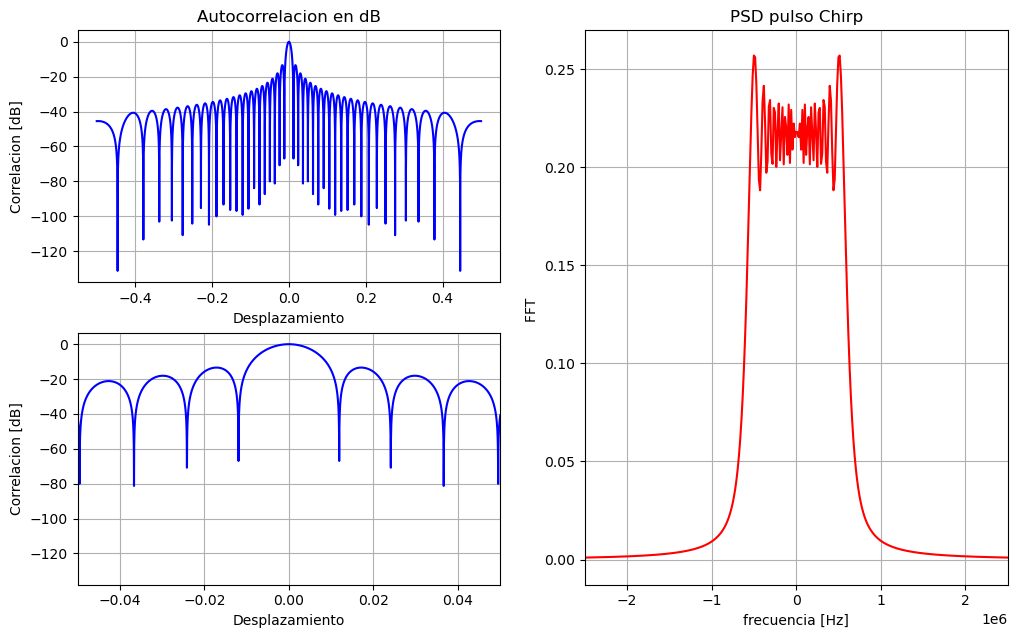

In [233]:
fig = plt.figure(figsize=(6*2,2*6*.6))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

nu = Ambiguedad_D0(pulso, 1, ax1, ax2)
nu = T_FFT(pulso, dt, B, 'PSD pulso Chirp', 'r', ax3)


### Obrservación

La modulación en frecuencia del pulso nos permite tener un lóbulo principal acotado y mejorar la resolución espacial. 

 
## Modulación no lineal 1:
### Odd polynomial frequency signal

Esta función de frecuencia se detalla en [1] y la misma se ecuentra optimizada para distintos valores de $\beta$ en la función de costo.
Solamente se indican los coeficientes impares de la sumatoria que determina la modulación ya que la misma es asimétrica. Igualando a cero los coeficientes pares logramos una mejora en el tiempo y la calidad de la optimización.

$\zeta$: Este parámetro nos permite extender en ancho de banda más allá del estricto [−B/2,  B/2].
Para polinomios mayores a grado 11 no se ven mejoras notables. Para este polinomio la función es llamada 6D-OPFS debido a sus 6 grados de libertad dado por los coeficientes impares. Este pulso queda definido por {$\zeta$ ,  p1,  p3,  p5,  p7,  p9,  p11}. Se posee una tabla de valores para distintos valores de Beta.
$$f(t)= \zeta \sum_{k=0}^{N}p_{k}(2t/T)^{N-k}, \dfrac{-T}{2} \leq t \leq \dfrac{T}{2}$$

|     | $\beta$ = 0.00    | $\beta$ = 0.25      | $\beta$ = 0.50     |$\beta$ = 0.75      |$\beta$ = 1         |
|-----|-------------|---------------|--------------|--------------|--------------|
| $\zeta$   | 1.2         | 1.4           | 0.9969788    | 1.4          | 1.0888194    |
| p1  | 2.9833301       |3.0322699 |3.2706690| 2.3061778| 3.8595594
| p3  | − 6.0137280 | − 5.7741939 |− 6.0897503 |− 4.5383562| − 4.9449954
| p5  | 4.4237943  | 4.1432707| 3.8108525 |3.1916240| 1.7412935
| p7  | 1.3836515      |  1.4752306 |− 0.7409933 |− 0.8812900| 0.0453272
| p9  | 0.1308622 | 0.3757097| 0.0982280 |0.1745349 |0.3363182
| p11 | 0.4617059 | 0.2827204 |0.4160720| 0.2849106| 0.0630924




In [278]:
def NLFM_1(tt, tau, B, Beta, Grafico, ax = None):


    '''
    Funcion pulso con modulacion no lineal 1.
    
    Parameters:
    ---
    tt: float
        Vector base de tiempo.
    tau: float
        Duracion del pulso [s]. 
    B: float
        Ancho de banda [Hz].
    Beta: float
        Coeficiente de optimizacion.
    Grafico: int
        Indica si se desea realizar el grafico de frecuencia y retardo de grupo por medio de la funcion.    
    ax:
        Ejes para realizar el grafico.    
    Returns:
    ---
    f_t: float
        Variacion de frecuencia no lineal.
    

    '''

    P = [[2.9833301, 3.0322699, 3.2706690, 2.3061778, 3.8595594], 
        [-6.0137280, -5.7741939, -6.0897503, -4.5383562, -4.9449954], 
        [ 4.4237943,  4.1432707 , 3.8108525,  3.1916240,  1.7412935], 
        [-1.3836515,  -1.4752306,  -0.7409933,  -0.8812900,  0.0453272], 
        [0.1308622,  0.3757097,  0.0982280,  0.1745349 , 0.3363182], 
        [0.4617059,  0.2827204,  0.4160720,  0.2849106 , 0.0630924]]
    Sigma = [1.2, 1.4 , 0.9969788, 1.4, 1.0888194]
    N = 12
    n = np.arange(1, N , 2)
    indice_Beta = 0
    
    if Beta == 0.25 :
        indice_Beta = 1
    elif Beta == 0.5 :
        indice_Beta = 2
    elif Beta == 0.75 :
        indice_Beta = 3
    elif Beta == 1 :
        indice_Beta = 4
        
    c = 0
    f_t_n = np.zeros((np.size(n), np.size(tt)))
    f_t_s = np.zeros(np.size(tt))
    for k in n:
        f_t_n[c][:] = P[c][indice_Beta]*((2*tt/tau)**(N-k))
        f_t_s = f_t_s + f_t_n[c][:]
        c += 1 
    
    f_n1 = Sigma[indice_Beta]*B/2*f_t_s/max(f_t_s)
    
    
    if Grafico == 1 :
        if ax is None:
            fig, ax = plt.subplots(ncols=1, nrows=1)
        ax.plot(tt, f_n1)
        ax.set_title("Funcion f(t)")
        ax.set_xlabel("Tiempo [s]")
        ax.set_ylabel("Frecuencia [Hz]")
        ax.grid()
            

    return np.nan_to_num(f_n1)

### Modulación no lineal 1 - Pulso

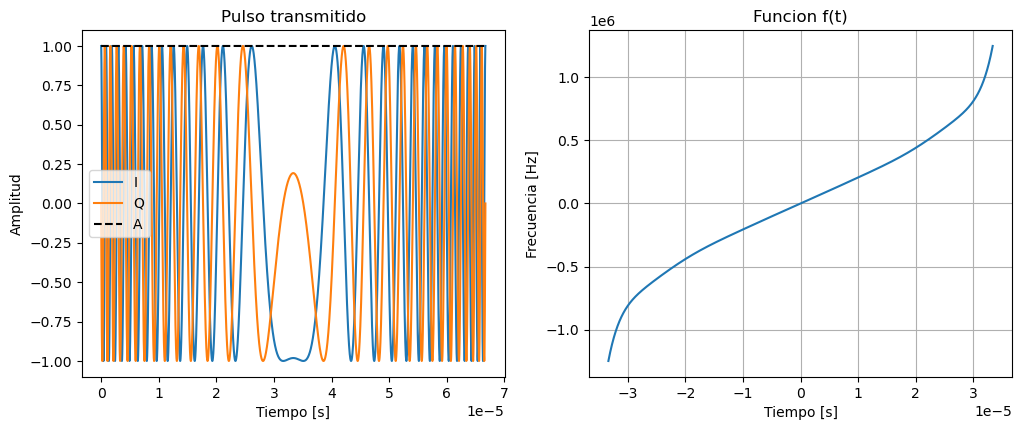

In [273]:
# duracion del pulso en segundos
tau = 66.71e-6 
# Ancho de banda
B = 2.5e6
# Periodo de muestreo
dt = 1e-9 
# Amplitud del pulso
Ap = 1 
# Tiempo total de muestreo en segundos
L = 1*tau 
# Parametro de diseño
Beta = 0.5

tt = np.arange(0, L + dt, dt) 
td = tt - tau/2

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(6*2,6*.75))

f = NLFM_1(td, tau, B, Beta, 1, axs[1])
pulso = np.exp(1.j*np.pi*2*np.cumsum(f)*dt)


nu = Graficar_Pulso(tt, pulso, axs[0])

### Modulación no lineal 1 - Autocorrelación y ancho de banda

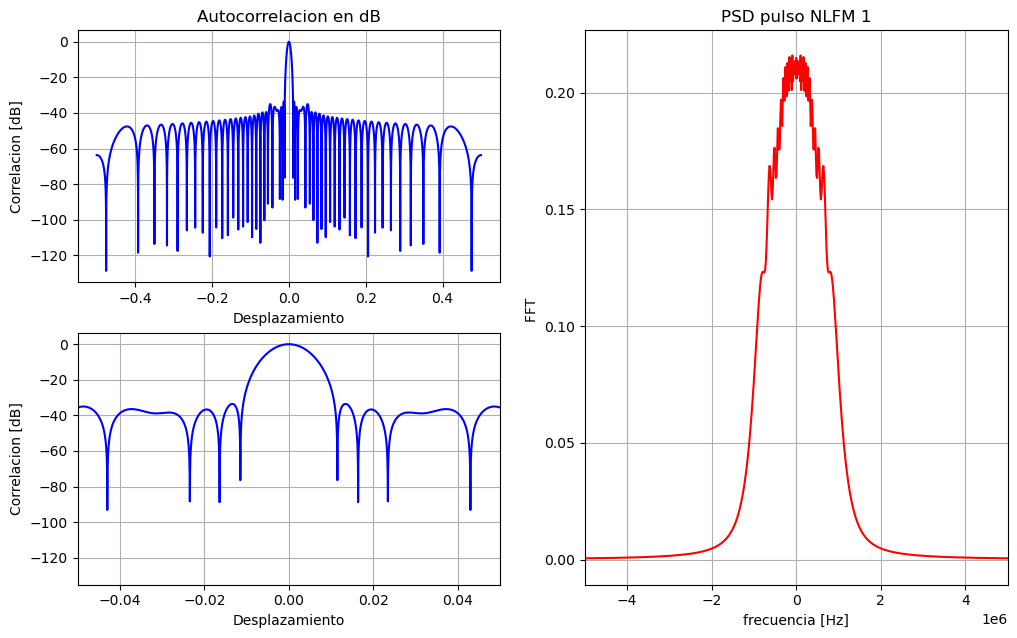

In [274]:
fig = plt.figure(figsize=(6*2,2*6*.6))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

nu = Ambiguedad_D0(pulso, 1, ax1, ax2)
nu = T_FFT(pulso, dt, B, 'PSD pulso NLFM 1', 'r', ax3)

## Modulación no lineal 2:
### Asymmetric time exponentiated FM (ATEFM):

La función de frecuencia posee un solo parámetro v,  con ν $\in$ (1,  2] usado para controlar la no-linealidad,  este parámetro se encuentra tabulado en [1] como resultado de la optimización del pulso para distintos valores de la función de costo con parámetro $\beta$ :

$$
f(t, v) = 
    \begin{cases} 
        \frac{B}{2}( \frac{2(t+T/2)}{T} )^{v-1} - \frac{B}{2},  \frac{-T}{2} \leq t \leq 0,  \\ \\
        \frac{-B}{2}( \frac{2(-t+T/2)}{T} )^{v-1} + \frac{B}{2},  0 \leq t \leq \frac{T}{2}. \\
    \end{cases}
$$

Para mayor información referirse a la referencia [1].



In [248]:
def NLFM_2(tt, tau, B, Beta, Grafico, ax = None):
    
    '''
    Funcion pulso con modulacion no lineal 2.
    
    Parameters:
    ---
    tt: float
        Vector base de tiempo.
    tau: float
        Duracion del pulso [s]. 
    Beta: float
        Coeficiente de optimizacion.
    B: float
        Ancho de banda [Hz].
    Grafico: int
        Indica si se desea realizar el grafico de frecuencia y retardo de grupo por medio de la funcion.
    ax:
        Eje para reliazar la grafica
    
    Returns:
    ---
    f_t: float
        Variacion de frecuencia no lineal.
    

    '''
    # Parametros de diseño
    v = 2.0957537
    if Beta == 0.25 :
        v = 1.7356345
    elif Beta == 0.5 :
        v = 1.6155135
    elif Beta == 0.75 :
        v = 1.6155135
    elif Beta == 1 :
        v = 1.4533719

    tt = tt.astype(np.complex128)
    f_n2 = np.nan_to_num(((B/2)*(2*(tt + (tau/2))/tau)**(v-1) - B/2)*(abs((tt*2 + tau/2)/tau) < 0.5))
    f_n2 = np.nan_to_num(f_n2 + ((-B/2)*((2*(-tt + (tau/2))/tau)**(v-1)) + B/2)*(abs((tt*2 - tau/2)/tau) < 0.5))


    if Grafico == 1 :
        if ax is None:
            fig, ax = plt.subplots(ncols=1, nrows=1)
        ax.plot(tt, f_n2)
        ax.set_title("Funcion f(t)")
        ax.set_xlabel("Tiempo [s]")
        ax.set_ylabel("Frecuencia [Hz]")
        ax.grid()


    return f_n2

### Modulación no lineal 2 - Pulso

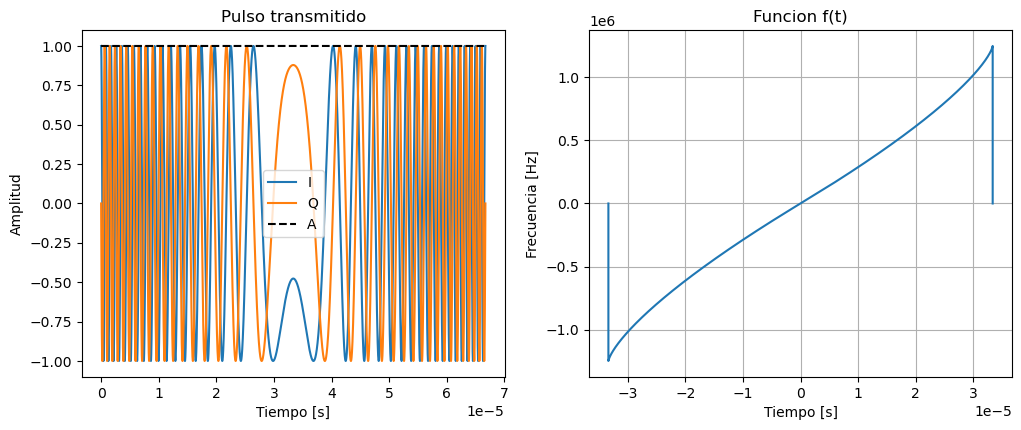

In [249]:
# duracion del pulso en segundos
tau = 66.71e-6 
# Ancho de banda
B = 2.5e6
# Periodo de muestreo
dt = 1e-9 
# Amplitud del pulso
Ap = 1 
# Tiempo total de muestreo en segundos
L = 1*tau 
# Parametro de diseño
Beta = 0.25

tt = np.arange(0, L + dt, dt) 
td = tt - tau/2


fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(6*2,6*.75))

f = NLFM_2(td, tau, B, Beta, 1, axs[1])

pulso = np.exp(1.j*np.pi*2*np.cumsum(f)*dt)
## nn: Variables sin uso
nn1 = Graficar_Pulso(tt, pulso, axs[0])


### Modulación no lineal 2 - Autocorrelación y ancho de banda

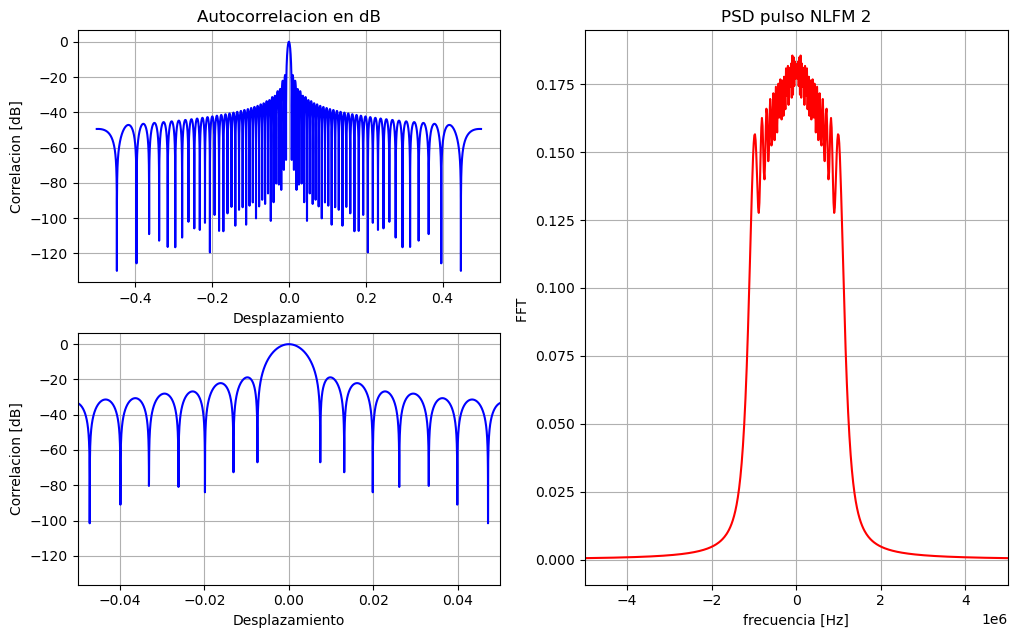

In [250]:
fig = plt.figure(figsize=(6*2,2*6*.6))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

nu = Ambiguedad_D0(pulso, 1, ax1, ax2)
nu = T_FFT(pulso, dt, B, 'PSD pulso NLFM 2', 'r', ax3)

## Modulación no lineal 3: 

Esta forma de onda posee un parámetro k el cual controla la alinealidad del pulso,  el valor $k=1$ devuelve una modulación lineal en frecuencia. Aprovecharemos esta forma de onda para aplicar un ventaneo y observar los resultados.

Primer análisis para ventana:

$$
w (n) = kv + (1 − kv) \cos^2 \left( \frac{ \pi n}{M − 1} \right) ,  |n| ≤ \frac{M − 1}{2}
$$
Se utilizo una ventana con kv=0.5 y se obtuvieron mejores resultados a comparación con el factor $k=0.17$ propuesto en la literatura.

función retardo de grupo:
$$
T_g(f)=\dfrac{Tf}{B}+\dfrac{T}{2 \pi } \left( \frac{1 − k}{1 + k} \right) \sin \left( \dfrac{2 \pi f}{B} \right)
$$
Siguiendo la literatura se utiliza k=0.17

Para mayor información referirse a la referencia [2].


In [244]:
def NLFM_3(B_n3, tau_n3, dt_3, k, Grafico, ax = None):
    
    '''
    Funcion pulso con modulacion no lineal 3.
    
    Parameters:
    ---
    B_n3: float
        Ancho de banda [Hz]. 
    tau_n3: float
        Duracion del pulso [s].
    k: float
        Parametro de alinealidad.
    dt_n3: float
        Tiempo de muestreo
    Grafico: int
        Indica si se desea realizar el grafico de frecuencia y retardo de grupo por medio de la funcion.
    ax:
        Eje para reliazar la grafica
    
    Returns:
    ---
    f_t: float
        Variacion de frecuencia no lineal.
    

    '''

    # Numero de puntos utilizados para el pulso
    N_n3 = int(np.round(tau_n3/dt_3))
    
    # Vector de frecuencia
    ff_n3 = ((np.arange(0, N_n3 + 1)/N_n3)*B_n3) - (B_n3/2)
    
    # Fucnion retardo de grupo
    Tg_n3 = ((tau_n3*ff_n3)/B_n3) + (tau_n3/(2*np.pi))*((1 - k)/(1 + k))*np.sin((2*np.pi*ff_n3)/B_n3)

    # Funcion inversa de la funcion retardo de grupo
    f_n3 = np.cumsum(np.histogram(Tg_n3[:, None], bins = len(Tg_n3[:, None]))[0])
    
    # Escalado y centrado
    f_n3 = ((f_n3/max(f_n3)) - 0.5)*B_n3

    # Graficos 
    if Grafico == 1 :
        if ax is None:
            fig, ax = plt.subplots(ncols=1, nrows=1)
        ax.plot(Tg_n3, ff_n3)
        ax.set_title("Funcion f(t)")
        ax.set_xlabel("Tiempo [s]")
        ax.set_ylabel("Frecuencia [Hz]")
        ax.grid()
    
    return f_n3

### Modulación no lineal 3 - Pulso

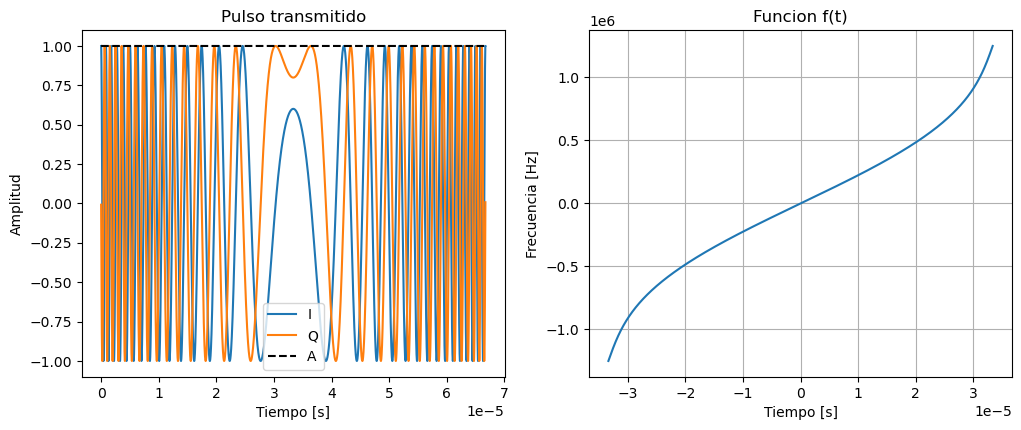

In [246]:
# Parametro de diseño
k = 0.17

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(6*2,6*.75))

f = NLFM_3(B, tau, dt, k, 1, axs[1])
pulso = np.exp(1.j*np.pi*2*np.cumsum(f)*dt)
## nn: Variables sin uso
nn1 = Graficar_Pulso(tt, pulso, axs[0])

### Modulación no lineal 3 - Autocorrelación y ancho de banda

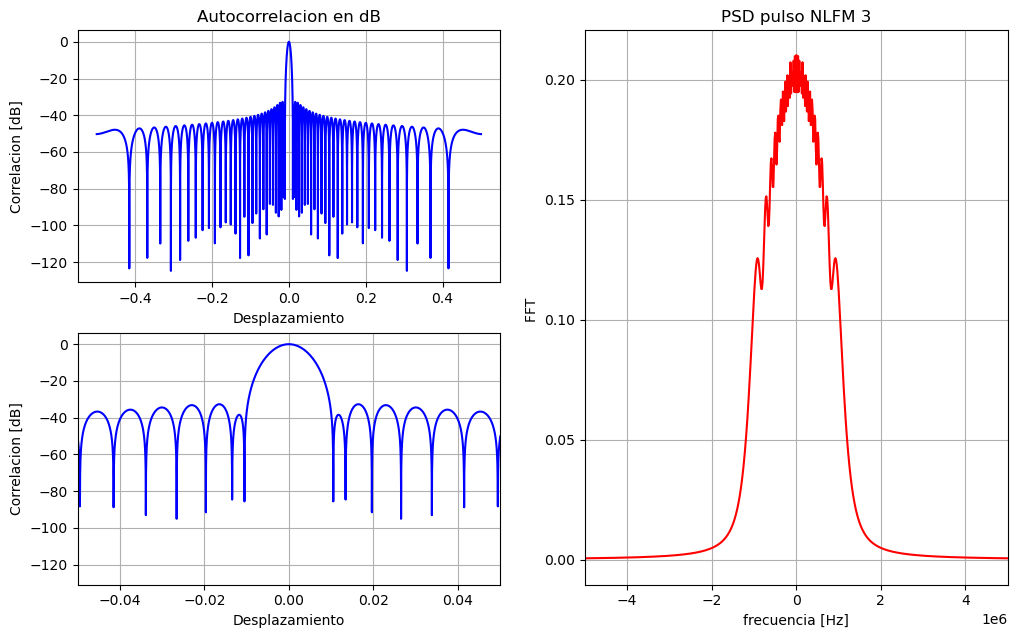

In [247]:
fig = plt.figure(figsize=(6*2,2*6*.6))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

nu = Ambiguedad_D0(pulso, 1, ax1, ax2)
nu = T_FFT(pulso, dt, B, 'PSD pulso NLFM 3', 'r', ax3)

## Herramienta de análisis 

Se presenta una herramienta que permite al comparación entre las distintas modulaciones no lineales y la modulación chirp, ademas, se agrego una ventana a la modulación no lineal para poder analizar su efecto. 

La herramienta de análisis se utiliza llamando a la función: 

*Analisis_NLFM()*


la cual nos permitirá analizar la autocorrelación del pulso y la transformada de fourier del mismo. Además, presenta una tabla con la siguiente información:

* *SLL.* : Indica la amplitud del mayor lóbulo secundario en dB.
* *T Lobulo [T pulso]* : Indica el ancho temporal del lóbulo principal de la autocorrelación del pulso, expresada en fracción del tiempo de pulso.
* *B 0.5* [Hz] : Indica el ancho de banda de mitad de amplitud del pulso. 
* *PSLR* : Indica el valor calculado de PSLR para la modulación seleccionada, referirse a Medidas de desempeño de pulsos NLFM.
* *ISLR* : Indica el valor calculado de ISLR para la modulación seleccionada, referirse a Medidas de desempeño de pulsos NLFM.
* *NPSLR* : Indica el valor calculado de NPSLR para la modulación seleccionada, referirse a Medidas de desempeño de pulsos NLFM.
* *NISLR* : Indica el valor calculado de NISLR para la modulación seleccionada, referirse a Medidas de desempeño de pulsos NLFM.

La función nos permitirá modificar los siguientes parámetros mediante deslizadores:

* *Modulacion* : Permite seleccionar la modulación a comparar.
* *tau* : Duracion del pulso de radar en $\mu$ S
* *Bnlfm* : Ancho de banda del pulso.
* *Band_spam* : Incremento del ancho de banda del pulso no lineal.
* *k* : Este parametro permite controlar la alinealidad en la modulación no lineal 4.
* *Beta* : Permite ajustar el pulso en la modulación 1 y 2. 
* *Spam_T* : Permite controlar el spam del tiempo en el grafico de correlación.
* *Spam_B* : Permite controlar el spam de la frecuencia en el gráfico de la PSD.

Para la comparación con un pulso ventaneado, se utiliza una ventana de Hann para modular la amplitud del pulso. Debemos tener en cuenta que la energía de los pulsos varía y la comparación no es óptima.

In [271]:
def Analizar_NLFM(Modulacion = 1, tau = 66.71, Bnlfm = 1.25e6, Band_spam = 1, k = 0.17, BETA = 0, spam_T = 1, spam_B = 1):

 
    '''
    Funcion de comparacion modulacion lineal vs no lineal vs no lineal ventaneada (Hann)
    
    Parameters:
    ---
    Modulacion: int
        Tipo de modulación a analizar: 1 para NLFM_1, 2 para NLFM_2, 3 para NLFM_3.
    tau: float
        Duracion del pulso en microsegundos.
    Bnlfm: float
        Ancho de banda de la señal en Hz.
    Band_spam: int
        Factor de aumento del ancho de banda en la modulación no lineal.
    k: float
        Parámetro de alinealidad para la modulación no lineal.
    BETA: float
        Parámetro para la modulación NLFM_1 y NLFM_2.
    spam_T: int
        Factor de aumento en el spam del eje x de la gráfica de la función de ambigüedad.
    spam_B: int
        Factor de aumento en el spam del eje x de la gráfica del espectro de potencia.
    
    Returns:
    ---
    None
    

    '''

    # Duracion del pulso en segundos
    tau = tau*1e-6
    # Tiempo de muestreo
    dt = 1/25e6
    # Largo del registro a analizar en segundos
    L = tau 
    # Vector base de tiempo
    tt = np.arange(0, L + dt, dt)
    # Base de tiempo desplazada
    td = tt - tau/2

    if Modulacion == 1:
        # NLFM_1 devuelve la fase de la señal
        f = NLFM_1(td, tau, Band_spam*Bnlfm, BETA, 0)
        nombre = 'NLFM 1'
    elif Modulacion == 2 :
        # NLFM_2 devuelve la fase de la señal
        f = NLFM_2(td, tau, Band_spam*Bnlfm, BETA, 0)
        nombre = 'NLFM 2'
    elif Modulacion == 3 :
        # NLFM_3 devuelve la fase de la señal
        f = NLFM_3(Band_spam*Bnlfm, tau, dt, k, 0)
        nombre = 'NLFM 3'

    # Envolvente compleja del pulso
    pulso = np.exp(1.j*2*np.pi*dt*np.cumsum(f))
    
    # Pulso chirp como comparacion
    Sx, t_x = chirp_signal(1,  tau,  1/dt,  Bnlfm, len(tt))
    
    # Pulso ventaneado con ventana de HANN
    pulso_ventaneado = pulso*np.hanning(len(pulso))

    # Funcion de ambiguedad del pulso ventaneado
    tt_1, FA_NLFM_con_ventana = Ambiguedad_D0(pulso_ventaneado, 0)
    #plt.axis([-0.1,  0.1,  -70,  0 ])
   
    # Funcion de ambiguedad pulso sin ventanear
    tt_2, FA_NLFM_sin_ventana = Ambiguedad_D0(pulso, 0)
    tt_2, FA_chirp = Ambiguedad_D0(Sx, 0)
    
    # Ejes
    
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(6*2,6*.75))
    
    
    # Graficos comparativos
    axs[0].plot(tt_2,  FA_NLFM_sin_ventana,  label = 'NLFM Sin ventana',  color = 'blue')
    axs[0].plot(tt_1,  FA_NLFM_con_ventana,  label = 'NLFM Con ventana',  color = 'red')
    axs[0].plot(tt_2,  FA_chirp,  label = 'CHRIP',  color = 'orange',  linestyle = 'dashed')
    axs[0].grid()
    axs[0].legend()
    axs[0].set_title("Autocorrelacion en dB")
    axs[0].set_xlabel("Desplazamiento [Tiempo de pulso]")
    axs[0].set_ylabel("Correlacion [dB]")
    axs[0].set_xlim(-spam_T,  spam_T)
    axs[0].set_ylim(-70,  0)
    
    # Grafico pulsos
    #nn = Graficar_Pulso(tt, pulso_ventaneado)
    #nn = Graficar_Pulso(tt, pulso)
    #nn = Graficar_Pulso(t_x, Sx)
    
    # DEP pulso sin ventaneo
    ff_dep, dep_pulso = T_FFT(pulso, dt, Bnlfm*spam_B, 'NLFM Sin ventana', 'b', axs[1])
    # DEP pulso ventaneado
    ff_dep1, dep_pulso_ventaneado = T_FFT(pulso_ventaneado, dt, Bnlfm*spam_B, 'NLFM Con ventana', 'r', axs[1])
    # DEP pulso LFM
    ff_dep2, dep_pulso_chirp = T_FFT(Sx, dt, Bnlfm*spam_B, 'Comparacion PSD', 'orange', axs[1])

    # Medidas de desempeño

    # Amplitud lobulos secundarios
    Maximos_chirp = FA_chirp[argrelextrema(FA_chirp, np.greater)[0]]
    Maximos_NLFM_sin_ventana = FA_NLFM_sin_ventana[argrelextrema(FA_NLFM_sin_ventana, np.greater)[0]]
    Maximos_NLFM_con_ventana = FA_NLFM_con_ventana[argrelextrema(FA_NLFM_con_ventana, np.greater)[0]]

    LobuloPrimario_chirp = np.max(FA_chirp)
    LobuloPrimario_NLFM_sin_ventana = np.max(FA_NLFM_sin_ventana)
    LobuloPrimario_NLFM_con_ventana = np.max(FA_NLFM_con_ventana)

    LobuloSecundario_chirp = np.delete(Maximos_chirp, 
                                                    np.where(Maximos_chirp == LobuloPrimario_chirp))
    LobuloSecundario_NLFM_sin_ventana = np.delete(Maximos_NLFM_sin_ventana, 
                                                    np.where(Maximos_NLFM_sin_ventana == LobuloPrimario_NLFM_sin_ventana))
    LobuloSecundario_NLFM_con_ventana = np.delete(Maximos_NLFM_con_ventana, 
                                                    np.where(Maximos_NLFM_con_ventana == LobuloPrimario_NLFM_con_ventana))
    
    PSLR_chirp = (10**(np.max(LobuloSecundario_chirp)/10))/(10**(LobuloPrimario_chirp/10))
    ISLR_chirp = np.sum((10**((LobuloSecundario_chirp/10))))/(10**(LobuloPrimario_chirp/10))

    Max_Lobulo_Sec_chirp = np.max(LobuloSecundario_chirp)
    
    
    if len(LobuloSecundario_NLFM_sin_ventana) != 0 :
        PSLR = (10**np.max(LobuloSecundario_NLFM_sin_ventana)/10)/(10**(LobuloPrimario_NLFM_sin_ventana/10))
        ISLR = np.sum((10**(LobuloSecundario_NLFM_sin_ventana/10)))/(10**(LobuloPrimario_NLFM_sin_ventana/10))
        NPSLR = PSLR/PSLR_chirp
        NISLR = ISLR/ISLR_chirp      
        Max_Lobulo_Sec_NLFM = np.max(LobuloSecundario_NLFM_sin_ventana)  
        AnchoLobulo_NLFM = 2*np.min(np.abs(tt_2[argrelextrema(FA_NLFM_sin_ventana, np.less)[0]]))
    else:
        PSLR = 1
        ISLR = 1
        NPSLR = 1
        NISLR = 1
        Max_Lobulo_Sec_NLFM = None
        AnchoLobulo_NLFM = None

    if len(LobuloSecundario_NLFM_con_ventana) != 0 :
        PSLR_v = (10**np.max(LobuloSecundario_NLFM_con_ventana)/10)/(10**(LobuloPrimario_NLFM_con_ventana/10))
        ISLR_v = np.sum((10**(LobuloSecundario_NLFM_con_ventana/10)))/(10**(LobuloPrimario_NLFM_con_ventana/10))
        NPSLR_v = PSLR_v/PSLR_chirp
        NISLR_v = ISLR_v/ISLR_chirp
        AnchoLobulo_NLFM_ventaneado = 2*np.min(np.abs(tt_1[argrelextrema(FA_NLFM_con_ventana, np.less)[0]]))
        Max_Lobulo_Sec_CV = np.max(LobuloSecundario_NLFM_con_ventana) 
    else:
        PSLR_v = 1
        ISLR_v = 1
        NPSLR_v = 1
        NISLR_v = 1
        AnchoLobulo_NLFM_ventaneado = None
        Max_Lobulo_Sec_CV = None

    
    AnchoLobulo_Chirp = 2*np.min(np.abs(tt_2[argrelextrema(FA_chirp, np.less)[0]]))

    # Ancho de banda de mitad de potencia

    AnchoBanda_Chirp = 2*np.abs(ff_dep2[ np.where(dep_pulso_chirp == buscar_max_cercano(dep_pulso_chirp, np.max(dep_pulso_chirp)*0.5)) ])
    AnchoBanda_NLFM = 2*np.abs(ff_dep2[ np.where(dep_pulso == buscar_max_cercano(dep_pulso, np.max(dep_pulso)*0.5)) ])
    AnchoBanda_NLFM_ventaneada = 2*np.abs(ff_dep2[ np.where(dep_pulso_ventaneado == buscar_max_cercano(dep_pulso_ventaneado, np.max(dep_pulso_ventaneado)*0.5)) ])

    # tabla de comparación
    T_p = {
           'SLL' : [Max_Lobulo_Sec_chirp, Max_Lobulo_Sec_NLFM, Max_Lobulo_Sec_CV],
           'T Lobulo [T pulso]' : [AnchoLobulo_Chirp, AnchoLobulo_NLFM, AnchoLobulo_NLFM_ventaneado],
           'Ancho de banda [Hz]' : [AnchoBanda_Chirp[0], AnchoBanda_NLFM[0], AnchoBanda_NLFM_ventaneada[0]],
           'PSLR [dB]' : [PSLR_chirp, 10*np.log10(PSLR), 10*np.log10(PSLR_v)],
           'ISLR [dB]' : [ISLR_chirp, 10*np.log10(ISLR), 10*np.log10(ISLR_v)],
           'NPSLR [dB]' : [0, 10*np.log10(NPSLR),  10*np.log10(NPSLR_v)],
           'NISLR [dB]' : [0,  10*np.log10(NISLR),  10*np.log10(NISLR_v)]
          }
   
    print('ANALISIS DE MODULACION NO LINEAL: ' + nombre + '\n\n')

    df = pd.DataFrame(T_p)
    
    # Aplica formato exponencial con 2 decimales a todas las celdas del dataframe
    df = df.applymap('{:.3e}'.format)
    # Creamos un diccionario con los nombres de los nuevos índices
    new_index = {0: 'chirp', 1: nombre, 2: nombre + ' ventaneada'}
    # Cambiamos los índices numéricos por los strings
    df = df.set_index(pd.Series(new_index))

    display(df)

In [125]:
def Analisis_NLFM ():
        interact(Analizar_NLFM,
                Modulacion = (1, 3, 1), 
                tau = (1,  100, 1e-7), 
                B = (1e6,  10e6, 0.01e6), 
                Band_spam = (1, 2, 0.1),
                k = (0, 1, 0.01), 
                BETA = (0, 1, 0.25),
                spam_T = (0.001, 0.5, 0.01), 
                spam_B = (0.001, 1, 0.01)
                )

In [279]:
Analisis_NLFM()

interactive(children=(IntSlider(value=1, description='Modulacion', max=3, min=1), FloatSlider(value=66.71, des…

## Conclusiones
- A lo largo del trabajo hemos notado que las modulaciones no lineales de frecuencia deben ser antisimétricas y estar conformadas por curvas suaves en cuanto a la variación de frecuencia respecta. En el caso contrario las perturbaciones en la modulación elevan el nivel de los lóbulos secundarios.
- El ventaneo de la señal es una técnica que nos permite disminuir el nivel de los lóbulos secundarios a costa de ensanchar el lóbulo principal. Debemo tener en cuenta al hacer esta comparación que la energía del pulso se ve disminuida por el ventaneo. 
- Cuando se trabaja con pulsos NLFM se debe realizar una adaptación de la modulación al sistema deseado para hallar la función de modulación ideal para el trabajo a realizar. 
- La modulación no lineal permite reducir los lóbulos secundarios.
- De disponerse de ancho de banda en el sistema,  puede incrementarse en ancho de banda en la modulación no lineal para igual al ancho de banda del pulso chirp,  de esta forma se logra reducir el lóbulo principal a la vez que se disminuyen los lóbulos secundarios.


### Referencias:
[1]. Alphonse and Williamson,  Evaluation of a class of NLFM radar
signals,  EURASIP Journal on Advances in Signal Processing (2019) 2019:62; 
https://doi.org/10.1186/s13634-019-0658-9

[2]. Roohollah Ghavamirad and Mohammad Ali Sebt, 
Sidelobe Level Reduction in ACF of NLFM Waveform,  IET Radar,  Sonar & Navigation 13 (2019) 74-80
https://arxiv.org/pdf/1804.08126.pdf
